In [43]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
# gamma分布　確率密度関数より
def _gamma(x,k,s):
    return 1/(s*math.gamma(k))*((x/s)**(k-1))*math.exp(-x/s)

def _gauss(x, mu, sig2):
    return 1/math.sqrt(2*math.pi*sig2)*math.exp(-1/(2*sig2)*(x-mu)**2)

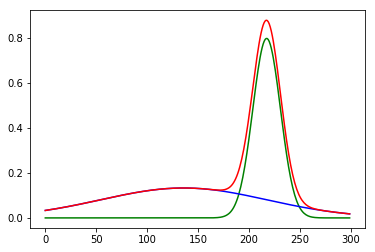

In [45]:
# 訓練データに異常データがまざっている場合（2個の正規分布の混合分布を考える）
N = 1000

mu0 = 3
sig0 = 0.5
pi0 = 0.6

mu1 = 0
sig1 = 3
pi1 = 0.4

n_list=np.linspace(-5.0,6.0,300)

g0=[_gauss(x,mu0,sig0**2) for x in n_list]
g1=[_gauss(x,mu1,sig1**2) for x in n_list]
g01 = [_gauss(x,mu0,sig0**2)+_gauss(x, mu1, sig1**2) for x in n_list]


plt.plot(g0, color="green" )
plt.plot(g1, color="blue")
plt.plot(g01, color="red")
plt.show()


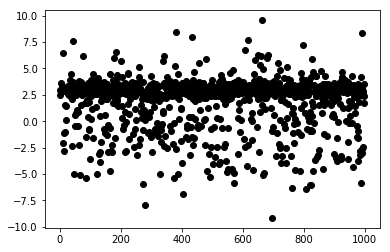

In [84]:
N = 1000    # 標本数

mu0 = 3.0   # 正常標本の平均
sig0 = 0.5  # 正常標本の標準偏差
pi0 = 0.6   # 正常標本の出現率

mu1 = 0.0   # 異常標本の平均
sig1 = 3.0  # 異常標本の標準偏差
pi1 = 0.4   # 異常標本の出現率


# 混合正規分布モデルを作成
n0 = norm.rvs(mu0, sig0, size=int(N*pi0))    # 正常標本
n1 = norm.rvs(mu1, sig1, size=int(N*pi1))    # 異常標本
n = np.concatenate([n0, n1])    # 混合
np.random.shuffle(n)   # シャッフル
plt.plot(n,'ko')

In [89]:
# 初期値
#正常標本の初期値
pi0 = 0.5       
mu0 = 5.0
sig0 = 1.0

#異常標本の初期値
pi1 = 0.5
mu1 = -5.0
sig1 = 5.0

# 結果格納リスト
pi0_list = []
pi1_list = []
mu0_list = []
mu1_list = []
sig0_list = []
sig1_list = []
qn0_list = []
qn1_list = []

# 期待値-最大化法
ite = range(10) # 反復回数

for i in ite:
    # 帰属度を計算
    piN0 = norm.pdf(x=n, loc=mu0, scale=sig0)
    piN1 = norm.pdf(x=n, loc=mu1, scale=sig1)
    qn0 = piN0 / (piN0 + piN1)
    qn1 = piN1 / (piN0 + piN1)

    # パラメータを計算
    pi0 = qn0.sum() / N
    pi1 = qn1.sum() / N
    mu0 = (qn0 * n).sum() / (N * pi0)
    mu1 = (qn1 * n).sum() / (N * pi1)
    sig0 = math.sqrt((qn0 * (n - mu0) * (n - mu0)).sum() / (N * pi0))
    sig1 = math.sqrt((qn1 * (n - mu1) * (n - mu1)).sum() / (N * pi1))

    # 結果を格納
    pi0_list.append(pi0)
    pi1_list.append(pi1)
    mu0_list.append(mu0)
    mu1_list.append(mu1)
    sig0_list.append(sig0)
    sig1_list.append(sig1)
    qn0_list.append(qn0)
    qn1_list.append(qn1)


print("正常モデル pi={0}, mu={1}, sig={2}".format(pi0, mu0, sig0))
print("雑音モデル pi={0}, mu={1}, sig={2}".format(pi1, mu1, sig1))


正常モデル pi=0.5458027758751142, mu=2.989045734109594, sig=0.4438111049540447
雑音モデル pi=0.4541972241248858, mu=0.6117158477822652, sig=3.108676054329774


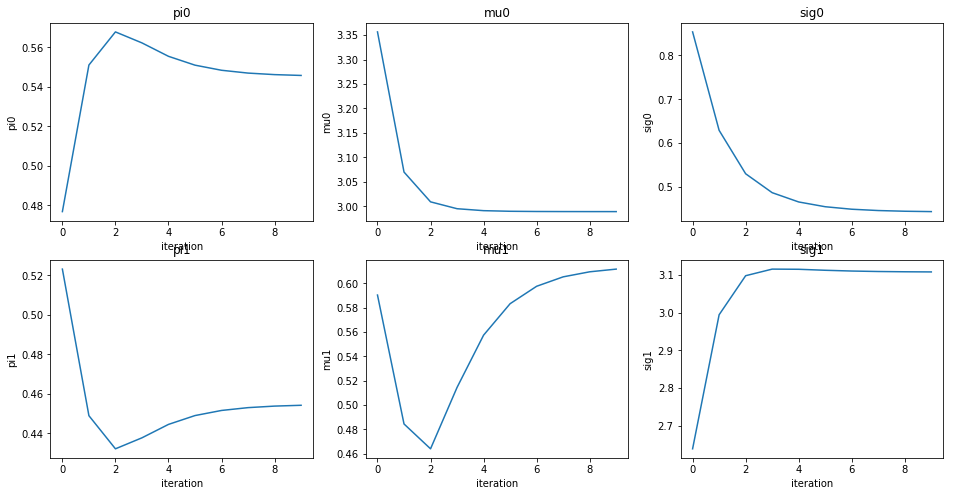

In [90]:
# プロット
plt.figure(figsize=(16,8))
plt.subplot(2, 3, 1)
plt.title("pi0")
plt.xlabel("iteration")
plt.ylabel("pi0")
plt.plot(ite, pi0_list)

plt.subplot(2, 3, 4)
plt.title("pi1")
plt.xlabel("iteration")
plt.ylabel("pi1")
plt.plot(ite, pi1_list)

plt.subplot(2, 3, 2)
plt.title("mu0")
plt.xlabel("iteration")
plt.ylabel("mu0")
plt.plot(ite, mu0_list)

plt.subplot(2, 3, 5)
plt.title("mu1")
plt.xlabel("iteration")
plt.ylabel("mu1")
plt.plot(ite, mu1_list)

plt.subplot(2, 3, 3)
plt.title("sig0")
plt.xlabel("iteration")
plt.ylabel("sig0")
plt.plot(ite, sig0_list)

plt.subplot(2, 3, 6)
plt.title("sig1")
plt.xlabel("iteration")
plt.ylabel("sig1")
plt.plot(ite, sig1_list)

plt.show()

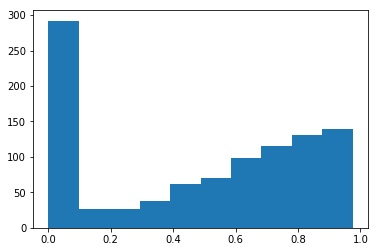

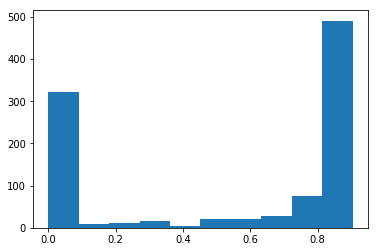

In [108]:
plt.hist(qn0_list[0])
plt.show()

plt.hist(qn0_list[9])
plt.show()

In [111]:
# 混合正規分布
from sklearn import mixture
# 分類器の生成
classifier = mixture.GaussianMixture(n_components=2, covariance_type='full') 